## Loading the data

In [2]:
import pandas as pd

# Load the dataset
data = pd.read_excel('/content/Online Retail.xlsx')

# Display the first few rows
print(data.head())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


## Exploring the data

In [3]:
#checking the null values
print(data.isnull().sum())


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


**observation**:

*   Description has 1454 missing values.
*   CustomerID has a significant number of missing values (135,080 entries are null).



In [4]:
#understand the data type
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


**Observations:**

*   InvoiceNo, StockCode, Description, and Country are categorical.
*   Quantity, UnitPrice, and CustomerID are numeric.
*   InvoiceDate is of type datetime64[ns].




In [5]:
#summary statistics
print(data.describe())


            Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 11:34:00       1.250000   
50%         3.000000            2011-07-19 17:17:00       2.080000   
75%        10.000000            2011-10-19 11:27:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       218.081158                            NaN      96.759853   

          CustomerID  
count  406829.000000  
mean    15287.690570  
min     12346.000000  
25%     13953.000000  
50%     15152.000000  
75%     16791.000000  
max     18287.000000  
std      1713.600303  


**Observations:**
1. **Quantity:**

*   Negative values indicate possible errors or returned items.
*   Wide range from -80,995 to 80,995 suggests outliers.

2. **UnitPrice:**

*   Negative values are likely data errors.
*   The maximum value (38,970) seems unusually high, possibly an outlier.

3. **CustomerID:**

*   Negative values are likely data errors.
*   The maximum value (38,970) seems unusually high, possibly an outlier.

4. **CustomerID:**

*   Represents unique customers but has missing values.

In [6]:
# Drop rows where CustomerID is missing
data = data.dropna(subset=['CustomerID'])

# Replace missing values in Description with "Unknown"
data['Description'] = data['Description'].fillna('Unknown')

# Check the result
print("Remaining Missing Values:")
print(data.isnull().sum())

Remaining Missing Values:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


### Analyzing Returned Products

In this step, we separate the **returned items** (with negative quantities) to gain valuable insights. By isolating returns data, we can:

- Identify customers with frequent returns
- Understand the impact of returns on total sales
- Spot products with high return rates

This helps ensure our primary sales analysis isn't skewed by returns, allowing us to focus on segmenting customers using clustering techniques later in the project.


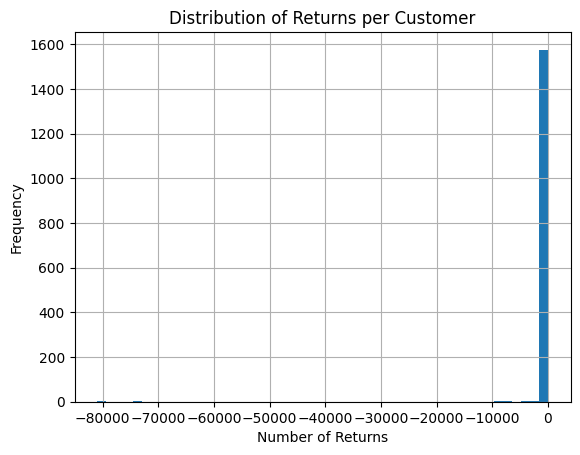

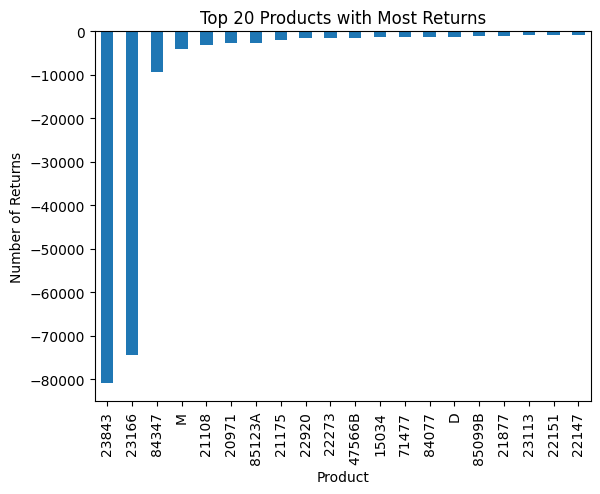

Total Returns: -274808
Total Sales: 5181696
Top 10 Products with Highest Return Rates:
StockCode
23843    -80995
23166    -74494
84347     -9367
M         -3995
21108     -3150
20971     -2617
85123A    -2578
21175     -2030
22920     -1527
22273     -1447
Name: Quantity, dtype: int64


In [7]:
# Step 1: Create a separate dataset for returned items (Negative Quantities)
returns_data = data[data['Quantity'] < 0]

# Step 2: Analyze return trends
# Calculate the number of returns per customer (sum of quantities for returns)
returns_per_customer = returns_data.groupby('CustomerID')['Quantity'].sum()

# Calculate the total number of returns and total sales
total_returns = returns_data['Quantity'].sum()
total_sales = data[data['Quantity'] > 0]['Quantity'].sum()

# Step 3: Check for customers with a high number of returns (customers returning more than they purchase)
high_return_customers = returns_per_customer[returns_per_customer < 0]

# Step 4: Analyze the products with the highest return rates
returns_per_product = returns_data.groupby('StockCode')['Quantity'].sum()

# Get the top 10 products with the most returns
top_10_returns = returns_per_product.sort_values().head(10)

# Step 5: Exclude the returns from the main dataset to avoid distorting the sales analysis
df_sales = data[data['Quantity'] > 0]

#plot the return distribution (Histogram of returns per customer)
import matplotlib.pyplot as plt

# Plot returns per customer
returns_per_customer.hist(bins=50)
plt.title("Distribution of Returns per Customer")
plt.xlabel("Number of Returns")
plt.ylabel("Frequency")
plt.show()

# Plot returns per product
returns_per_product.sort_values().head(20).plot(kind='bar')
plt.title("Top 20 Products with Most Returns")
plt.xlabel("Product")
plt.ylabel("Number of Returns")
plt.show()

# Print the summary
print(f"Total Returns: {total_returns}")
print(f"Total Sales: {total_sales}")
print(f"Top 10 Products with Highest Return Rates:\n{top_10_returns}")

### Insights from Analyzing Returned Items

1. **Top Returned Products**: The first few items in the list of top returns (e.g., `23843`, `23166`) likely indicate quality or fulfillment issues and should be reviewed for potential fixes or replacements.  
2. **Return Contribution**: Returns account for approximately 5-6% of total sales, a notable portion that highlights areas for improvement despite not dominating overall sales.  
3. **Customer Behavior**: Identifying customers with frequent returns provides an opportunity to address dissatisfaction and improve customer experience.  
4. **Clustering Relevance**: By excluding return items from the main dataset, we ensure cleaner and more relevant data for customer segmentation using clustering techniques.  


## Handling outliers for better efficiency of clustering techniques

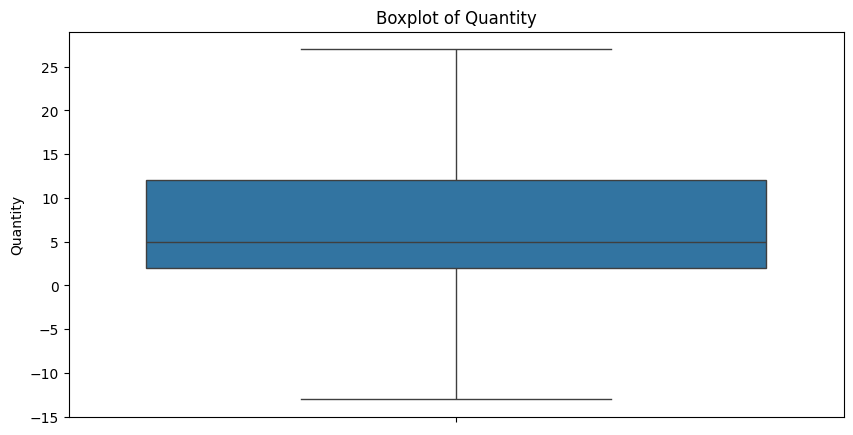

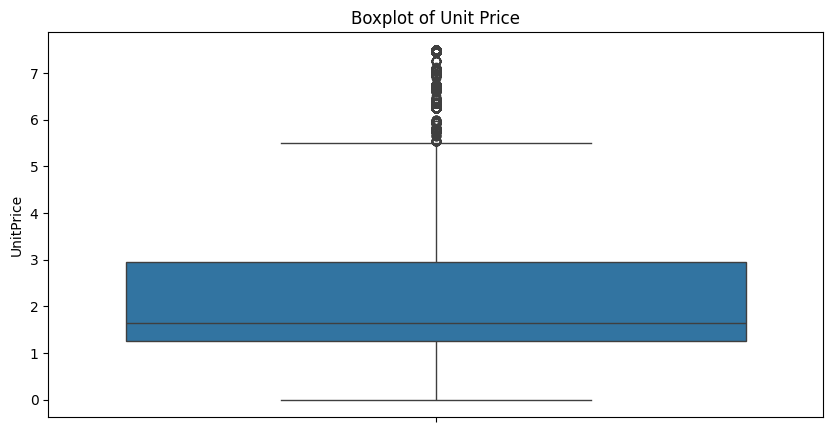

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for Quantity
plt.figure(figsize=(10, 5))
sns.boxplot(data['Quantity'])
plt.title("Boxplot of Quantity")
plt.show()

# Boxplot for UnitPrice
plt.figure(figsize=(10, 5))
sns.boxplot(data['UnitPrice'])
plt.title("Boxplot of Unit Price")
plt.show()


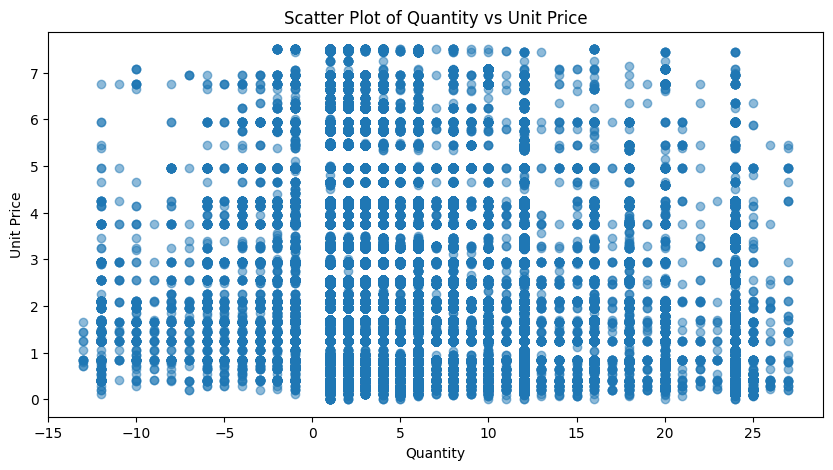

In [10]:
# Scatter plot for Quantity vs UnitPrice
plt.figure(figsize=(10, 5))
plt.scatter(data['Quantity'], data['UnitPrice'], alpha=0.5)
plt.title("Scatter Plot of Quantity vs Unit Price")
plt.xlabel("Quantity")
plt.ylabel("Unit Price")
plt.show()


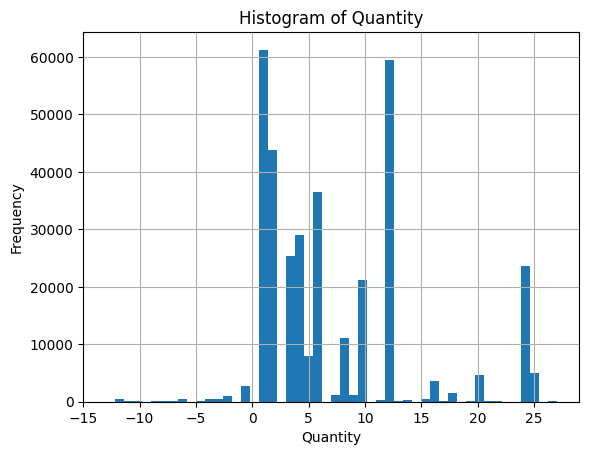

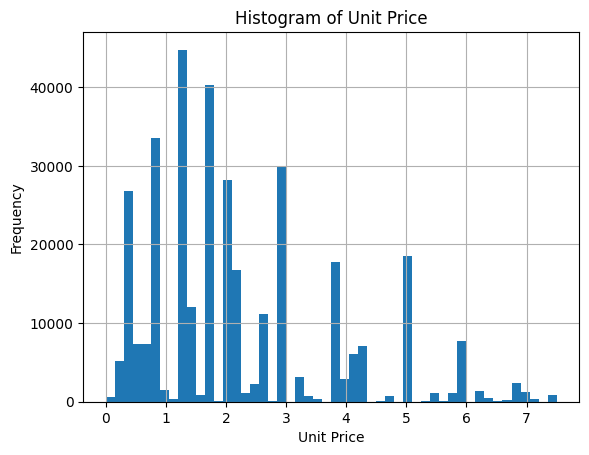

In [11]:
# Histogram for Quantity
data['Quantity'].hist(bins=50)
plt.title("Histogram of Quantity")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.show()

# Histogram for UnitPrice
data['UnitPrice'].hist(bins=50)
plt.title("Histogram of Unit Price")
plt.xlabel("Unit Price")
plt.ylabel("Frequency")
plt.show()


In [8]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1_quantity = data['Quantity'].quantile(0.25)
Q3_quantity = data['Quantity'].quantile(0.75)
IQR_quantity = Q3_quantity - Q1_quantity

Q1_unitprice = data['UnitPrice'].quantile(0.25)
Q3_unitprice = data['UnitPrice'].quantile(0.75)
IQR_unitprice = Q3_unitprice - Q1_unitprice

# Define outlier boundaries
lower_bound_quantity = Q1_quantity - 1.5 * IQR_quantity
upper_bound_quantity = Q3_quantity + 1.5 * IQR_quantity

lower_bound_unitprice = Q1_unitprice - 1.5 * IQR_unitprice
upper_bound_unitprice = Q3_unitprice + 1.5 * IQR_unitprice

# Filter out outliers
data = data[(data['Quantity'] >= lower_bound_quantity) & (data['Quantity'] <= upper_bound_quantity)]
data = data[(data['UnitPrice'] >= lower_bound_unitprice) & (data['UnitPrice'] <= upper_bound_unitprice)]

print(f"Remaining data after outlier removal: {data.shape}")


Remaining data after outlier removal: (344393, 8)


## Feature Engineering for Clustering

To enhance clustering, we summarize transactional data into meaningful features for each customer. The following features are derived:
- **Recency**: Days since the customer's last purchase.
- **Frequency**: Total number of transactions made by the customer.
- **Monetary Value**: Total amount spent by the customer.

These features capture customer engagement, loyalty, and spending behavior, enabling us to form meaningful customer segments. The data will be scaled to ensure equal contribution of features during clustering.


In [14]:
print(customer_data.columns)


Index(['CustomerID', 'InvoiceDate', 'InvoiceNo', 'Quantity', 'UnitPrice'], dtype='object')


In [15]:
# Step 1: Aggregate data by CustomerID
customer_data = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (data['InvoiceDate'].max() - x.max()).days,  # Recency: Days since last purchase
    'InvoiceNo': 'nunique',  # Frequency: Count of unique invoices
    'Quantity': 'sum',  # Total Quantity Purchased
    'UnitPrice': lambda x: np.sum(x * data.loc[x.index, 'Quantity'])  # Monetary Value: Total spend
}).reset_index()

# Renaming columns for clarity
customer_data.columns = ['CustomerID', 'Recency', 'Frequency', 'Quantity', 'Monetary']

# Step 2: Remove customers with zero or negative monetary values
customer_data = customer_data[customer_data['Monetary'] > 0]

# Step 3: Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_data[['Recency', 'Frequency', 'Monetary']])

print("Data ready for clustering.")


Data ready for clustering.


## Figuring the value of k for K-Means clustering

## **1. Using Elbow Method**

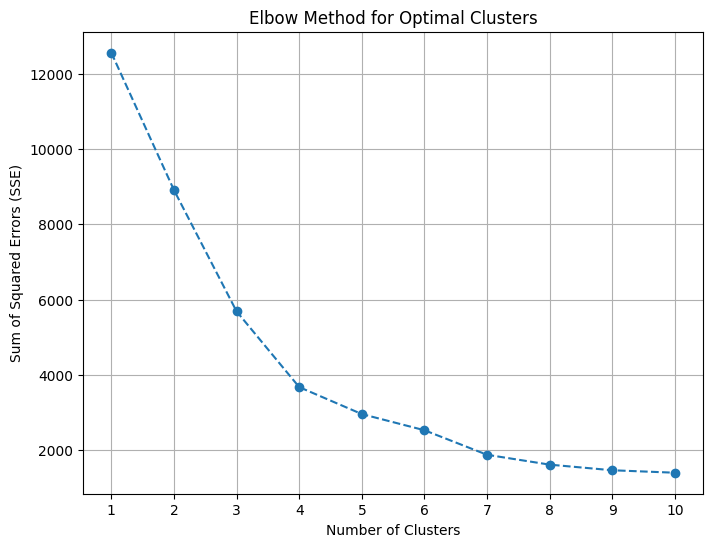

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow Method: Find the optimal number of clusters
sse = []  # List to store the SSE for each k
range_k = range(1, 11)  # Testing k from 1 to 10

# Loop to compute KMeans for different values of k
for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)  # Use the scaled customer data
    sse.append(kmeans.inertia_)  # Inertia is the SSE for the given k

# Plotting the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range_k, sse, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(range_k)  # Set x-ticks to be the values of k
plt.grid(True)
plt.show()


**Observations**: The optimal k can be between 4-7.

## **2. Using Silhouette Score**

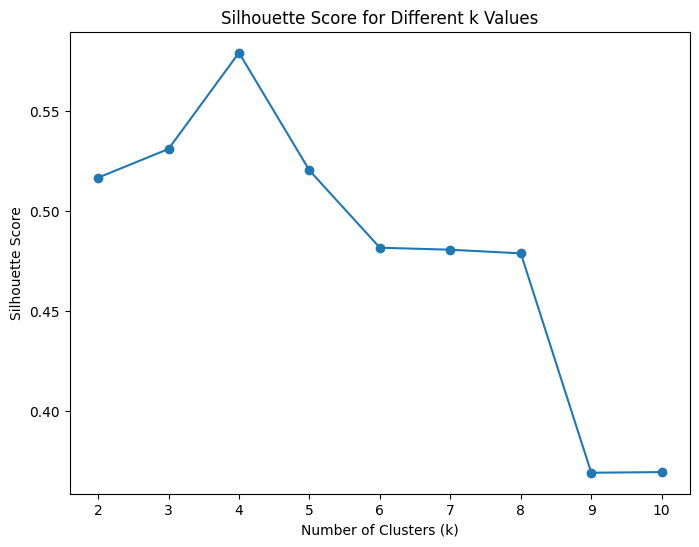

Silhouette Score for k=2: 0.5167136195117434
Silhouette Score for k=3: 0.5310882340077305
Silhouette Score for k=4: 0.579187551108178
Silhouette Score for k=5: 0.5203307205522991
Silhouette Score for k=6: 0.4816976723945322
Silhouette Score for k=7: 0.4807034909107759
Silhouette Score for k=8: 0.4788732944112266
Silhouette Score for k=9: 0.36921586059495237
Silhouette Score for k=10: 0.3695282964634529


In [17]:
from sklearn.metrics import silhouette_score

# Range of k values to test (you can adjust the range as needed)
k_values = range(2, 11)

# List to store silhouette scores for each k
silhouette_scores = []

# Loop over different values of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the silhouette scores for each k
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Score for Different k Values")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()

# Print silhouette scores for each k
for k, score in zip(k_values, silhouette_scores):
    print(f"Silhouette Score for k={k}: {score}")


**Observations:** As Silhouette Score for k=4 is highest, hence we will consider k=4 for K-means clustering.

Cluster Centers:
[[-0.48143825 -0.10235488 -0.09649592]
 [ 1.55388377 -0.35130782 -0.32824375]
 [-0.89692736 18.14468428 14.67221192]
 [-0.78316326  1.87993476  1.81199783]]


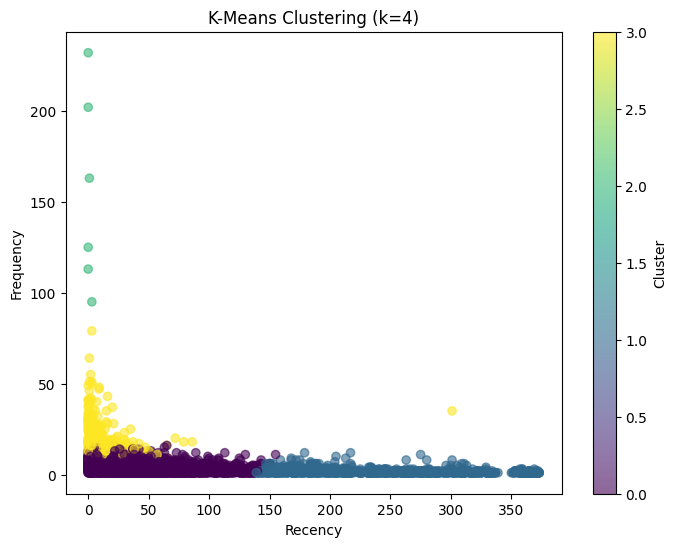

Cluster
0    2856
1    1035
3     291
2       6
Name: count, dtype: int64


In [18]:
# Perform K-Means clustering with k=4
kmeans = KMeans(n_clusters=4, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_features)

# Print the cluster centers
print(f"Cluster Centers:\n{kmeans.cluster_centers_}")

# Visualize the clustering results
# We can use the first two principal components (or simply the first two features for simplicity)
plt.figure(figsize=(8, 6))
plt.scatter(customer_data['Recency'], customer_data['Frequency'], c=customer_data['Cluster'], cmap='viridis', alpha=0.6)
plt.title("K-Means Clustering (k=4)")
plt.xlabel("Recency")
plt.ylabel("Frequency")
plt.colorbar(label="Cluster")
plt.show()

# Display the number of customers in each cluster
print(customer_data['Cluster'].value_counts())

In [19]:
# Add the cluster labels to the customer data
customer_data['Cluster'] = kmeans.labels_

# Group by cluster and calculate the mean values for Recency, Frequency, and Monetary
cluster_summary = customer_data.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()

# Display the cluster summary
print(cluster_summary)

# Optionally, you can also look at the number of customers in each cluster
cluster_sizes = customer_data['Cluster'].value_counts()
print("Cluster Sizes:\n", cluster_sizes)


            Recency   Frequency      Monetary
Cluster                                      
0         42.008053    3.793417    809.567301
1        244.523671    1.730435    304.712165
2          0.666667  155.000000  32982.718333
3         11.986254   20.219931   4967.159038
Cluster Sizes:
 Cluster
0    2856
1    1035
3     291
2       6
Name: count, dtype: int64


### Insights:

*   **Cluster 0** is the largest cluster and likely represents the typical customer.
*   **Cluster 1** contains customers who haven't made a purchase recently and have lower overall activity. This group may need special attention, such as re-engagement campaigns.
*   **Cluster 2** represents a very small but extremely valuable group of customers with high spending and frequency. This could be the group you focus your premium offerings on.
*   **Cluster 3** represents high-frequency customers with decent spending, showing an active and engaged customer base.
